# **Importing Libraries**

#### Installing keras library using pip

In [0]:
# https://keras.io/
!pip install -q keras
import keras

#### Importing libraries needed for convolutions and mnist dataset

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.regularizers import l2
from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#### Plotting the Image 

(60000, 28, 28)


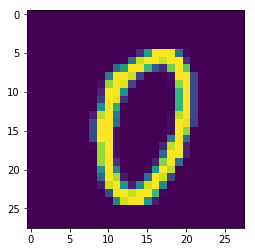

In [106]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1000])

#### Reshaping the Image into required format

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

#### Converting train and test data into float and normalizing the data

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


#### seeing the first 10 training labels

In [109]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

####  Convert 1-dimensional class arrays to 10-dimensional class matrices

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

#### Checking the training labels after converting them to 10-dimensional class matrices.

In [111]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

#### Importing the required operators for convolutions

In [0]:
from keras.layers import Conv2D, MaxPooling2D,BatchNormalization,Flatten,GlobalAveragePooling2D,Dropout

In [113]:

# confirm scale of pixels
print('Train min=%.3f, max=%.3f' % (X_train.min(), X_train.max()))
print('Test min=%.3f, max=%.3f' % (X_train.min(), X_test.max()))


Train min=0.000, max=255.000
Test min=0.000, max=255.000


In [114]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [116]:
#proper explanation of usage of Image data generator(both batch normalization and data augmentation):-https://keras.io/preprocessing/image/
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

# calculate mean on training dataset
datagen.fit(X_train)

# preparing an iterators to scale images
train_iterator = datagen.flow(X_train, Y_train, batch_size=128)
test_iterator = datagen.flow(X_test, Y_test, batch_size=128)
print('Batches train=%d, test=%d' % (len(train_iterator), len(test_iterator)))

# checking the shape
batchX, batchy = train_iterator.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))


Batches train=469, test=79
Batch shape=(128, 28, 28, 1), min=-0.424, max=2.822


# Neural Network Model

In [117]:


model1 = Sequential()
model1.add(Convolution2D(8,3,3,input_shape=(28,28,1),kernel_regularizer=l2(0.0001),bias_regularizer = l2(0.0001))) #(3*3,26*26)
model1.add(BatchNormalization(axis=3))
model1.add(Activation('relu'))
model1.add(Dropout(0.1))


model1.add(Convolution2D(10,3,3,kernel_regularizer=l2(0.0001),bias_regularizer = l2(0.0001))) #(5*5,24*24)
model1.add(BatchNormalization(axis=3))
model1.add(Activation('relu'))
model1.add(Dropout(0.1))


model1.add(Convolution2D(32,3,3,kernel_regularizer=l2(0.0001),bias_regularizer = l2(0.0001))) #(7*7,22*22)
model1.add(BatchNormalization(axis=3))
model1.add(Activation('relu'))
model1.add(Dropout(0.1))


model1.add(Convolution2D(8,1,1,kernel_regularizer=l2(0.0001),bias_regularizer = l2(0.0001))) #(7*7,22*22)
model1.add(BatchNormalization(axis=3))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2))) #(14*14,11*11)


model1.add(Convolution2D(10,3,3,kernel_regularizer=l2(0.0001),bias_regularizer = l2(0.0001))) #(16*16,9*9)
model1.add(BatchNormalization(axis=3))
model1.add(Activation('relu'))
model1.add(Dropout(0.1))


model1.add(Convolution2D(32,3,3,kernel_regularizer=l2(0.0001),bias_regularizer = l2(0.0001))) #(18*18,7*7)
model1.add(BatchNormalization(axis=3))
model1.add(Activation('relu'))
model1.add(Dropout(0.1))

model1.add(Convolution2D(10,1,1,kernel_regularizer=l2(0.0001),bias_regularizer = l2(0.0001))) #(18*18,7*7)
model1.add(BatchNormalization(axis=3))
model1.add(Activation('relu'))
model1.add(Dropout(0.1))


model1.add(Convolution2D(10,7,7,kernel_regularizer=l2(0.0001),bias_regularizer = l2(0.0001))) #(24*24,10*1*1)
#final activation as softmax.
model1.add(Flatten())
model1.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), input_shape=(28, 28, 1..., kernel_regularizer=<keras.reg..., bias_regularizer=<keras.reg...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), kernel_regularizer=<keras.reg..., bias_regularizer=<keras.reg...)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg..., bias_regularizer=<keras.reg...)`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (1, 1), kernel_regularizer=<keras.reg..., bias_regulariz

#### Printing the summary of the model

In [118]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_36 (Batc (None, 26, 26, 8)         32        
_________________________________________________________________
activation_41 (Activation)   (None, 26, 26, 8)         0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 24, 24, 10)        730       
_________________________________________________________________
batch_normalization_37 (Batc (None, 24, 24, 10)        40        
_________________________________________________________________
activation_42 (Activation)   (None, 24, 24, 10)        0         
__________

#### Importing the Adam optimizer.

In [0]:
from keras.optimizers import Adam

In [0]:


from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model1.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])



In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
from keras.callbacks import ModelCheckpoint

In [0]:
# checkpoint
filepath="./Assignment5_03_06_2019-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint,LearningRateScheduler(scheduler, verbose=1)]

In [124]:
type(test_iterator.y)

numpy.ndarray

In [125]:
# fit model with generator
model1.fit_generator(train_iterator, steps_per_epoch=len(train_iterator), epochs=40,callbacks=callbacks_list,validation_data=(test_iterator.x,test_iterator.y))

Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
469/469 [==============================] - 14s 30ms/step - loss: 0.2036 - acc: 0.9404 - val_loss: 12.4512 - val_acc: 0.2171

Epoch 00001: val_acc improved from -inf to 0.21710, saving model to ./Assignment5_03_06_2019-01-0.22.hdf5
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
469/469 [==============================] - 8s 17ms/step - loss: 0.0720 - acc: 0.9813 - val_loss: 6.9072 - val_acc: 0.5392

Epoch 00002: val_acc improved from 0.21710 to 0.53920, saving model to ./Assignment5_03_06_2019-02-0.54.hdf5
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
469/469 [==============================] - 8s 17ms/step - loss: 0.0628 - acc: 0.9845 - val_loss: 7.1931 - val_acc: 0.5311

Epoch 00003: val_acc did not improve from 0.53920
Epoch 4/40

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
469/469 [==================

In [0]:
#training and testing the model with 40 epocs

from keras.optimizers import Adam, SGD
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model1.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model1.fit(X_train, Y_train, batch_size=128, epochs=40, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

In [0]:
y_pred = model1.predict(X_test)

#### Seeing the first nine predictions

In [127]:
print(y_pred[:9])
print(y_test[:9])

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [6.5518503e-18 2.2196357e-13 7.4905455e-14 9.9999976e-01 0.0000000e+00
  3.4914927e-12 1.1227038e-18 6.7975890e-31 2.4738580e-07 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 1.2498157e-22 9.3579775e-22 0.0000000e+00
  0.0000000e+00 8.5175175e-21 0.0000000e+00 3.8872257e-24 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [2.6560417e-23 2.2524019e-21 6.9754862e-11 1.0000000e+00 0.0000000e+00
  1.0089814e-23 1.1124124e-19 6.2621111e-32 3.1975593e-15 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 

In [0]:
datagen_validator = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True,)

In [0]:
#Defining how the images should look like (Copied)
def show_misclassified(X, Y_ohe, Y_pred, classes,
                       columns=5, total=25,
                       pick_randomly=True, image_size_multiplier=4):
    y_true = np.argmax(Y_ohe, axis=1)
    yp = np.argmax(Y_pred, axis=1)
    misclassified = y_true != yp
    X = X[misclassified]
    Y_ohe = Y_ohe[misclassified]
    Y_pred = Y_pred[misclassified]
    y_true = y_true[misclassified]
    yp = yp[misclassified]
    total = min(total, len(X))
    rows = int(np.ceil(total / columns))

    indexes = np.random.choice(len(X), total, replace=False) if pick_randomly else list(range(0, total))

    X = np.take(X, indexes, axis=0)
    Y_ohe = np.take(Y_ohe, indexes, axis=0)
    Y_pred = np.take(Y_pred, indexes, axis=0)
    y_true = np.take(y_true, indexes, axis=0)
    yp = np.take(yp, indexes, axis=0)

    fig_height = rows * image_size_multiplier * 2
    fig_width = columns * image_size_multiplier

    fig = plt.figure(figsize=(fig_width, fig_height))
    idx1 = 0
    idx2 = 0
    jdx = 0
    for row in range(rows):
        for column in range(columns):
            if idx1 >= len(X):
                break
            img = X[idx1]
            assert (len(img.shape) == 3 and img.shape[2] in [1, 3, 4]) or len(img.shape) == 2
            ax = fig.add_subplot(rows * 2, columns, jdx + 1, xticks=[], yticks=[])
            cmap = None
            if (len(img.shape) == 3 and img.shape[2] == 1) or len(img.shape) == 2:
                cmap = "binary"
            if len(img.shape) == 3 and img.shape[2] == 1:
                img = img.reshape((img.shape[0], img.shape[1]))
            ax.imshow(img, cmap=cmap)
            ax.set_title("Predicted = %s, Actual = %s" % (classes[yp[idx1]], classes[y_true[idx1]]))
            idx1 += 1
            jdx += 1

        for column in range(columns):
            if idx2 >= len(Y_pred):
                break
            yps = Y_pred[idx2]
            ax = fig.add_subplot(rows * 2, columns, jdx + 1, xticks=[], yticks=[])
            ind = np.arange(len(classes))
            rects = ax.bar(ind, yps, 0.25, label='Labels')
            ax.set_ylabel('Probability')
            ax.set_yticks(np.arange(0, 1.2, 0.2))
            ax.set_title('Probability vs Labels')
            ax.set_xticks(ind)
            ax.set_xticklabels(classes)
            ax.legend()
            idx2 += 1
            jdx += 1
    plt.show()


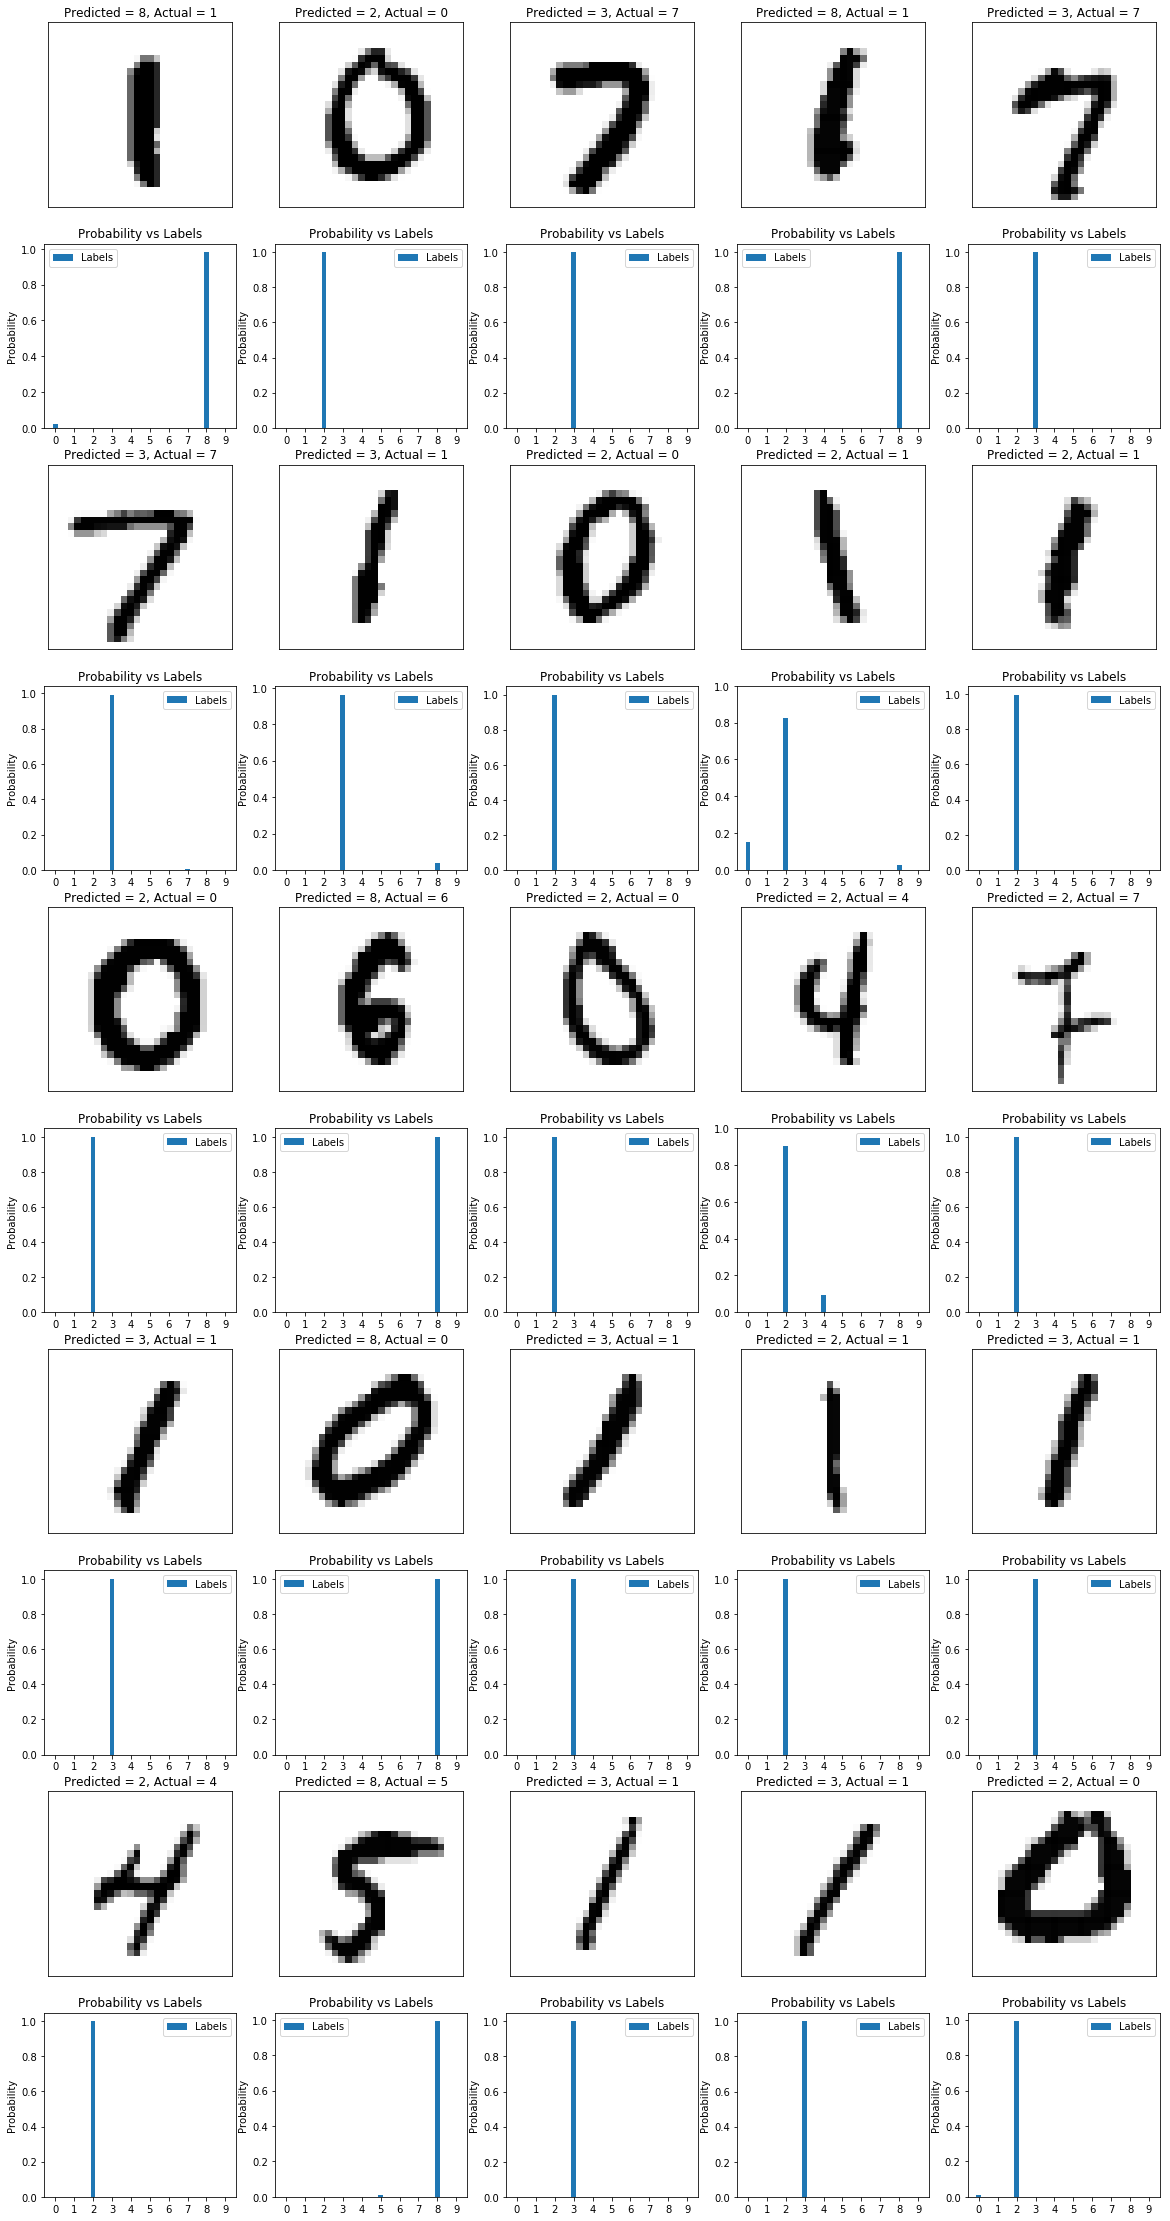

In [130]:
#plotting images aswell as its labels and a probalility graph from the model output
show_misclassified(X_test, Y_test, y_pred[:len(Y_test)], classes=list(range(0,10)), 
                       columns=5, total=25, 
                       pick_randomly=True, image_size_multiplier=4)

In [131]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_125'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model1.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model1.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

NameError: ignored